# I] Import and options


In [7]:
import pandas, numpy
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [8]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [9]:
%%time
path = input_file_directory + "seahorse_data/ocr/experiment_12/normalized/exp12_ocr_Norm_with_glutamine.csv"
ocr_exp2nonorm = pandas.read_csv(path, sep = ";")
ocr_exp2nonorm = ocr_exp2nonorm.rename(columns = {'Unnamed: 0':'Time'})
ocr_exp2nonorm = ocr_exp2nonorm.apply(lambda x: x.str.replace(',','.'))
ocr_exp2nonorm = ocr_exp2nonorm.astype(float)
print(ocr_exp2nonorm.shape)
ocr_exp2nonorm.head(2)

(15, 61)
Wall time: 41.5 ms


,Time,B02,C02,D02,E02,F02,G02,B03,C03,D03,...,D10,E10,F10,G10,B11,C11,D11,E11,F11,G11
0,1.31,40.0,34.2,36.90,37.76,63.23,43.26,28.38,31.82,36.70,...,41.86,62.86,52.13,43.91,15.86,25.83,25.51,29.19,23.48,24.09
1,7.75,38.1,33.0,35.38,36.42,61.47,41.96,27.36,29.86,20.95,...,40.30,57.63,48.81,41.39,16.80,24.90,24.60,27.08,22.18,23.86


In [10]:
#define the wells for each condition
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['B03','C03','D03','E03','F03','G03']
ev = ['B04','C04','D04','E04','F04','G04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


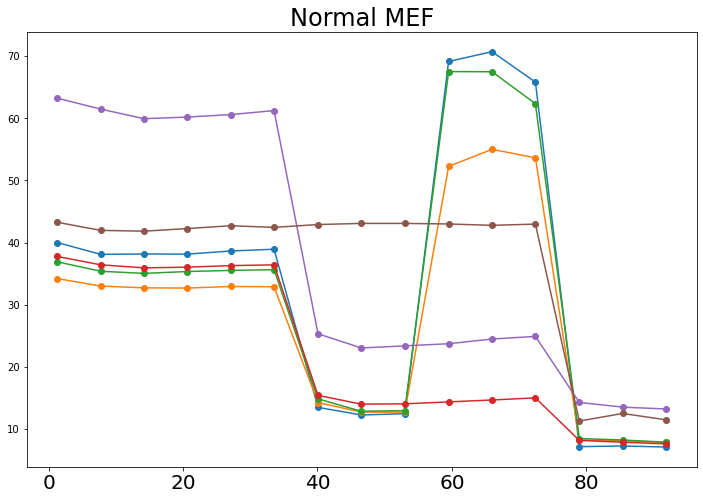

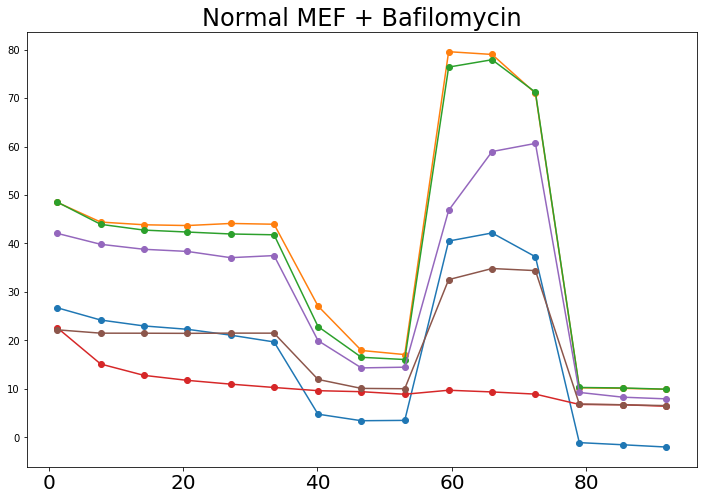

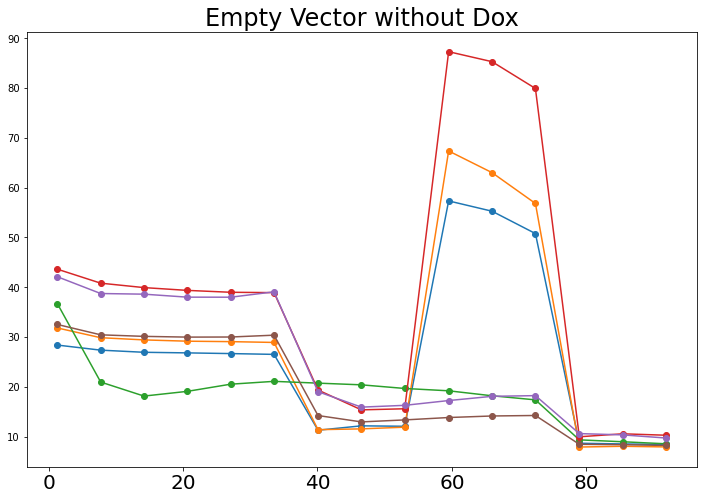

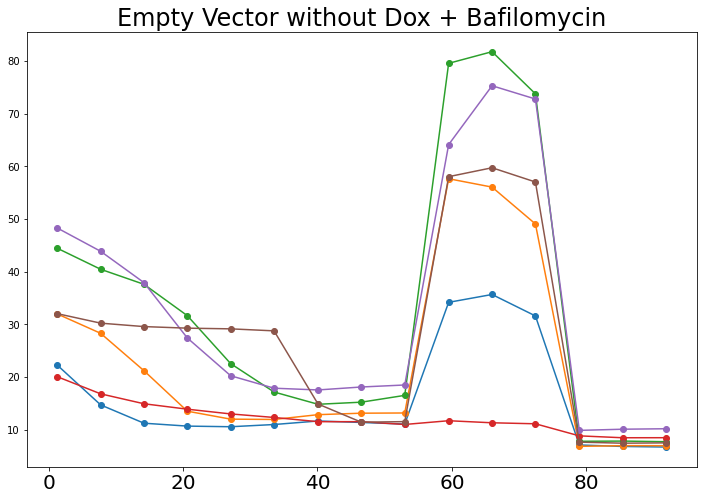

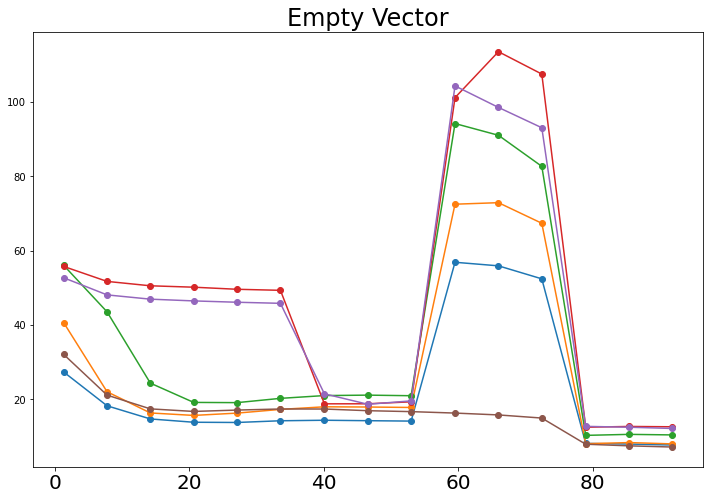

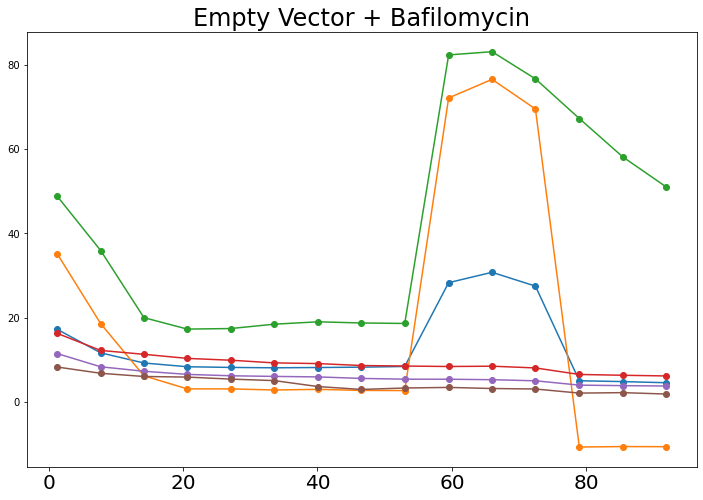

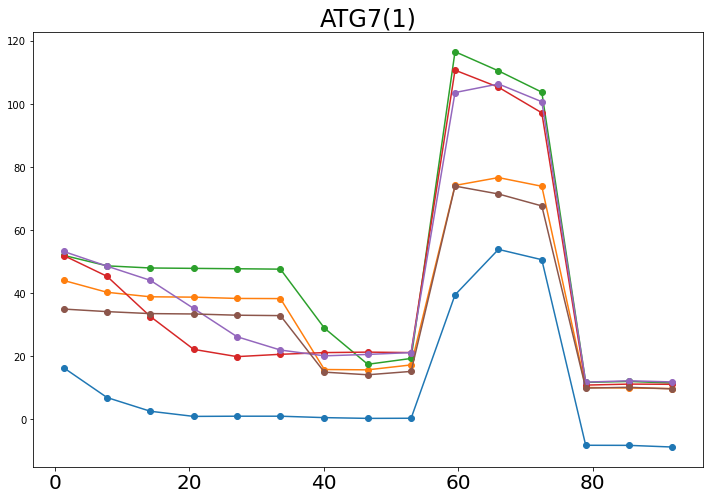

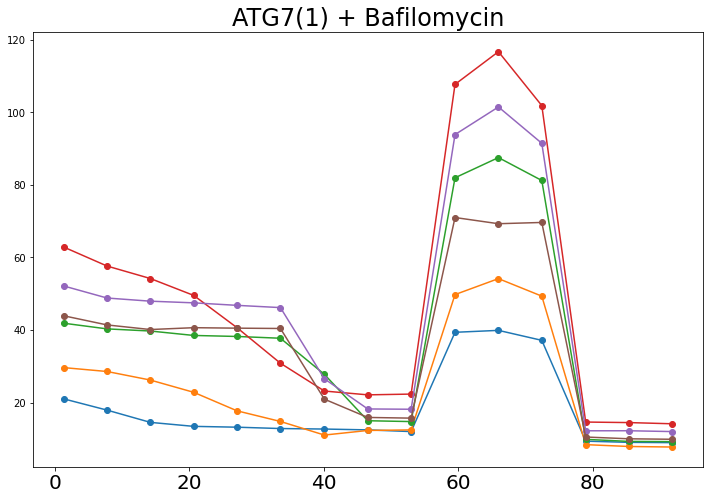

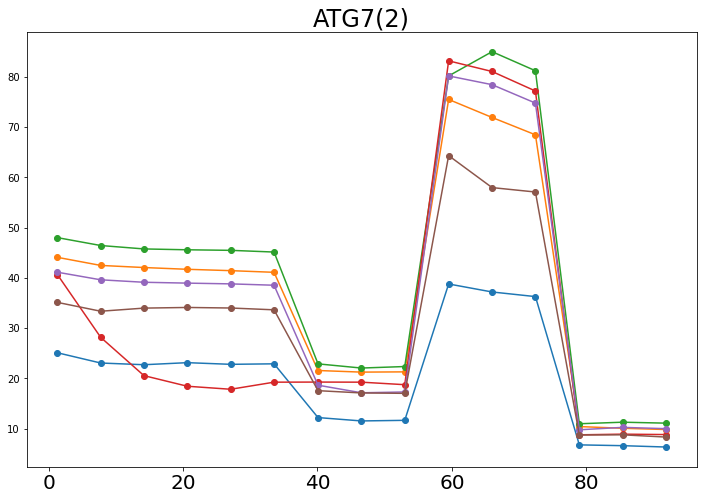

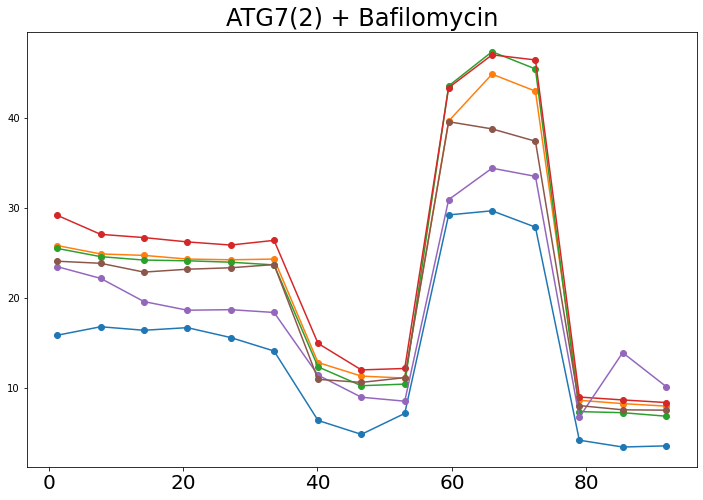

<Figure size 864x576 with 0 Axes>

In [11]:
#Visualization of all data
all_data = [[normal, 'Normal MEF'], [normal_baf, 'Normal MEF + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##graph
    name = data[1]
    plt.plot(ocr_exp2nonorm['Time'], ocr_exp2nonorm[data[0]], 'o-')
    plt.title(name)
   
    plt.show()
    plt.clf()
    print()

In [12]:
#define the wells for each condition
normal = ['B02','C02','D02']
ev_nodox = ['B03','C03','E03']
ev = ['B04','C04','D04','E04','F04']
wt1 = ['C05','D05','E05','F05','G05']
wt2 = ['C06','D06', 'F06','G06']

normal_baf = ['B07','C07','D07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','F08','G08']
ev_baf = ['B09','C09','D09']
wt1_baf = ['D10','E10','F10','G10']
wt2_baf = ['C11','D11','E11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


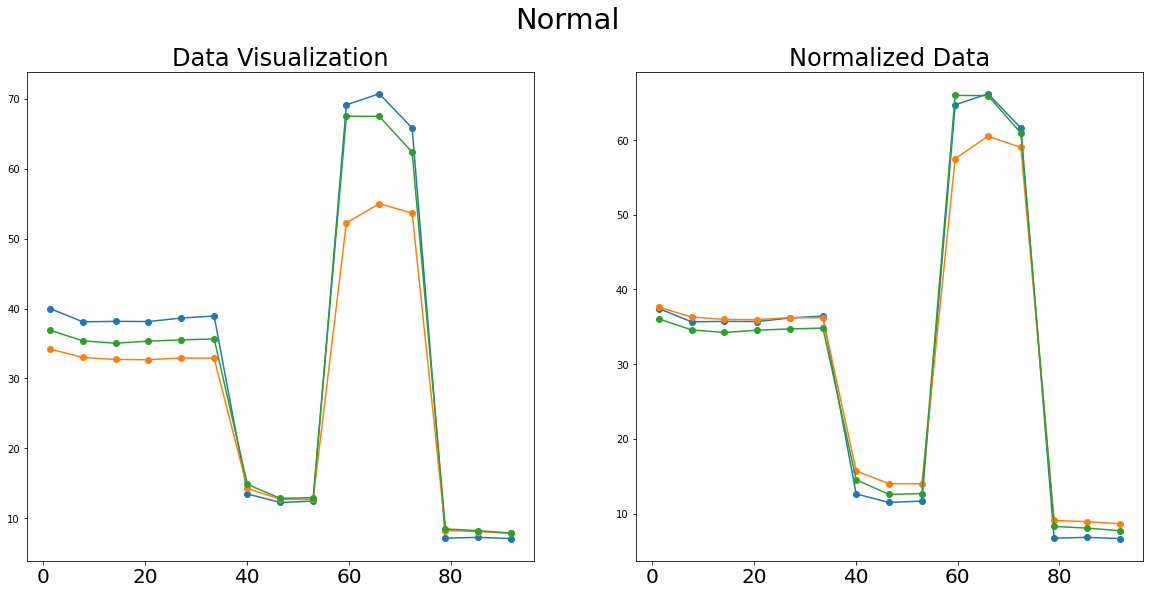

<Figure size 864x576 with 0 Axes>

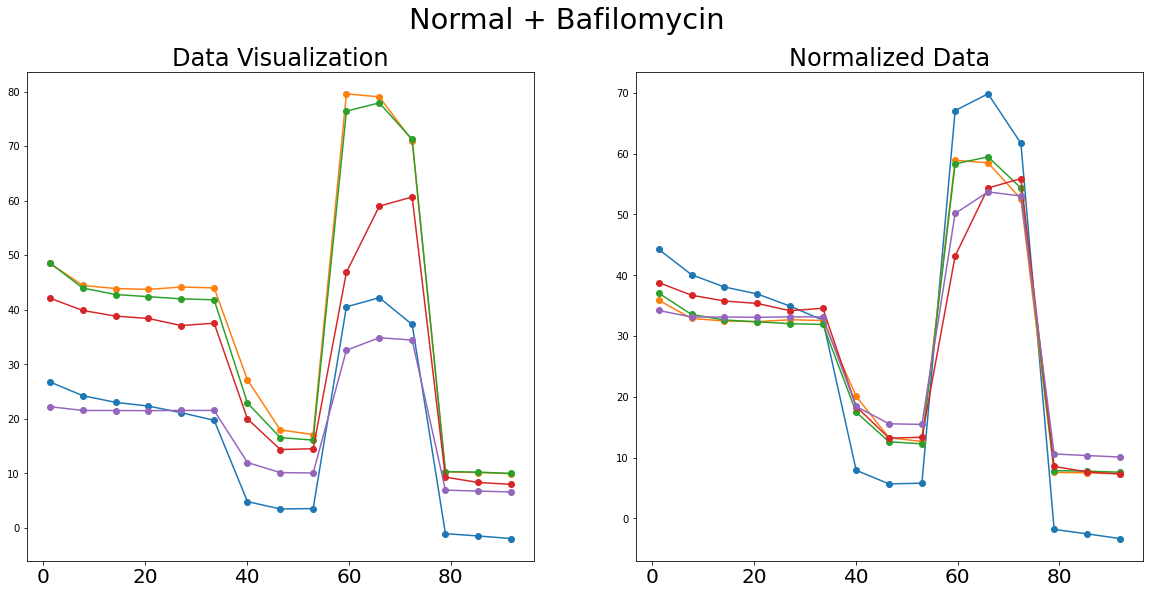

<Figure size 864x576 with 0 Axes>

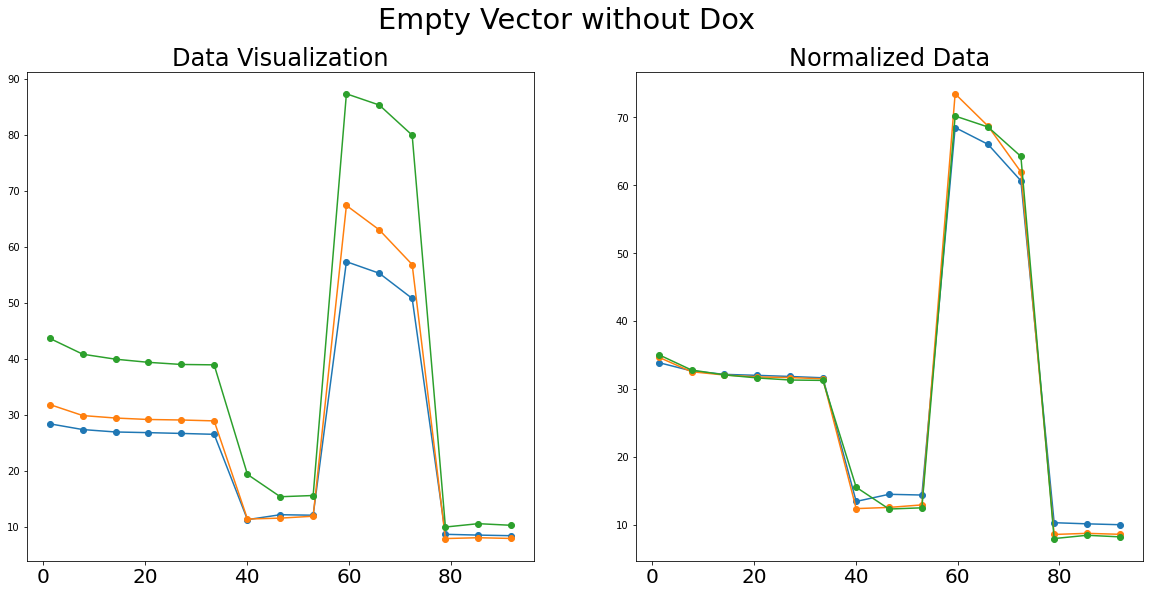

<Figure size 864x576 with 0 Axes>

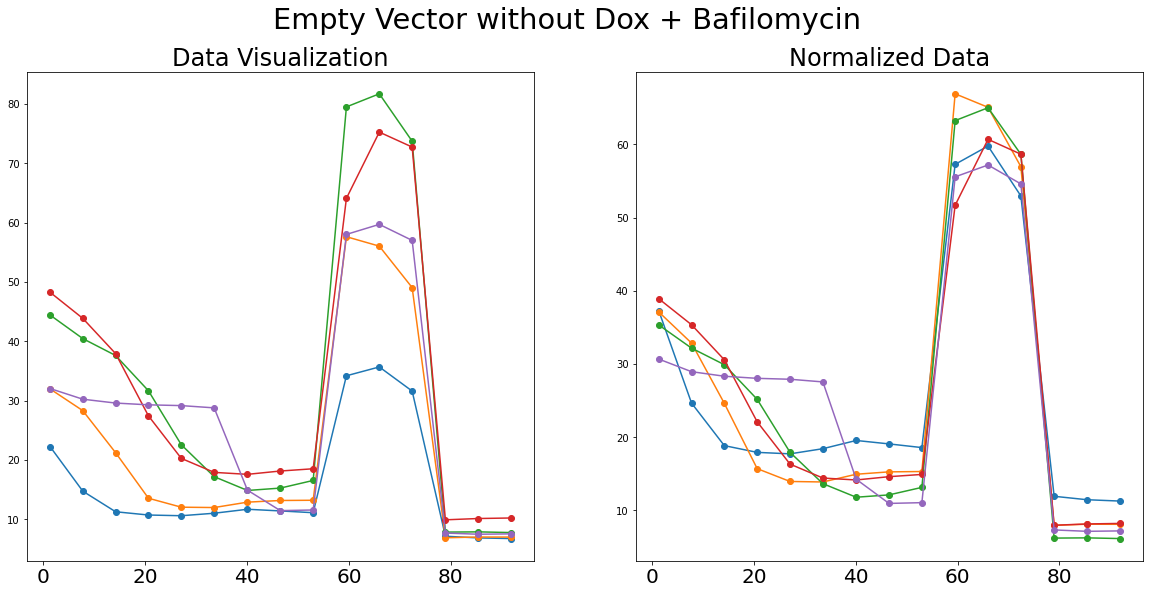

<Figure size 864x576 with 0 Axes>

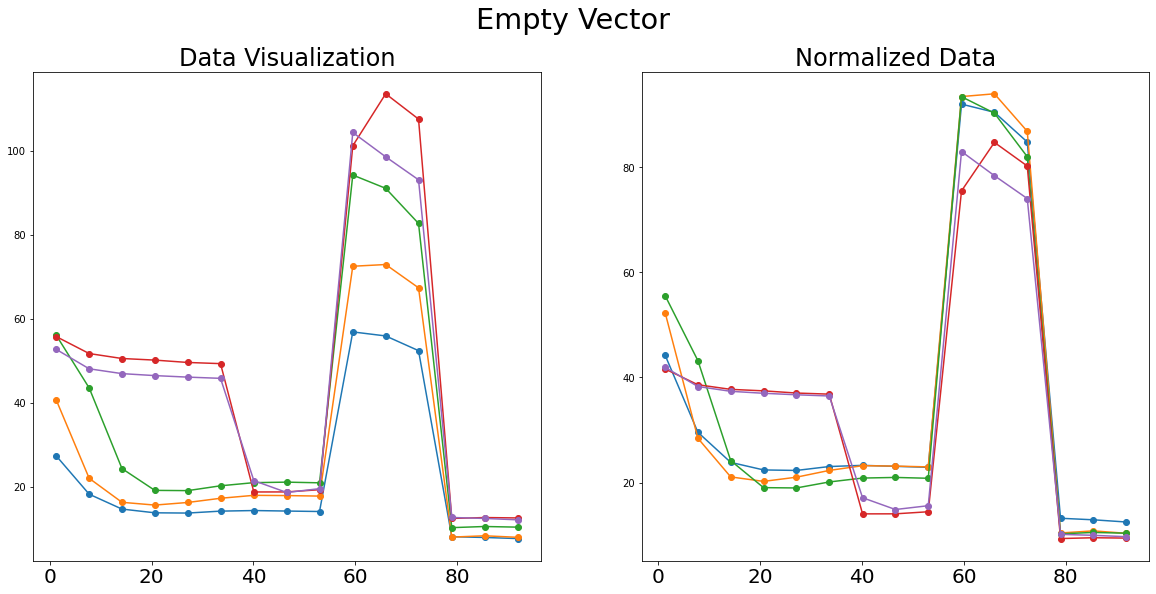

<Figure size 864x576 with 0 Axes>

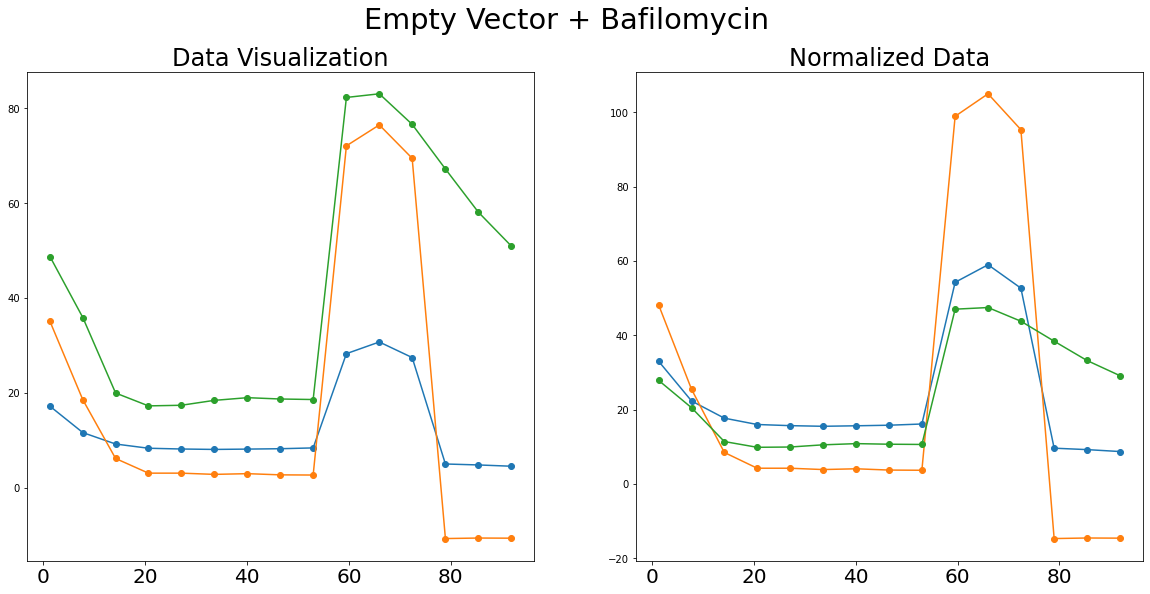

<Figure size 864x576 with 0 Axes>

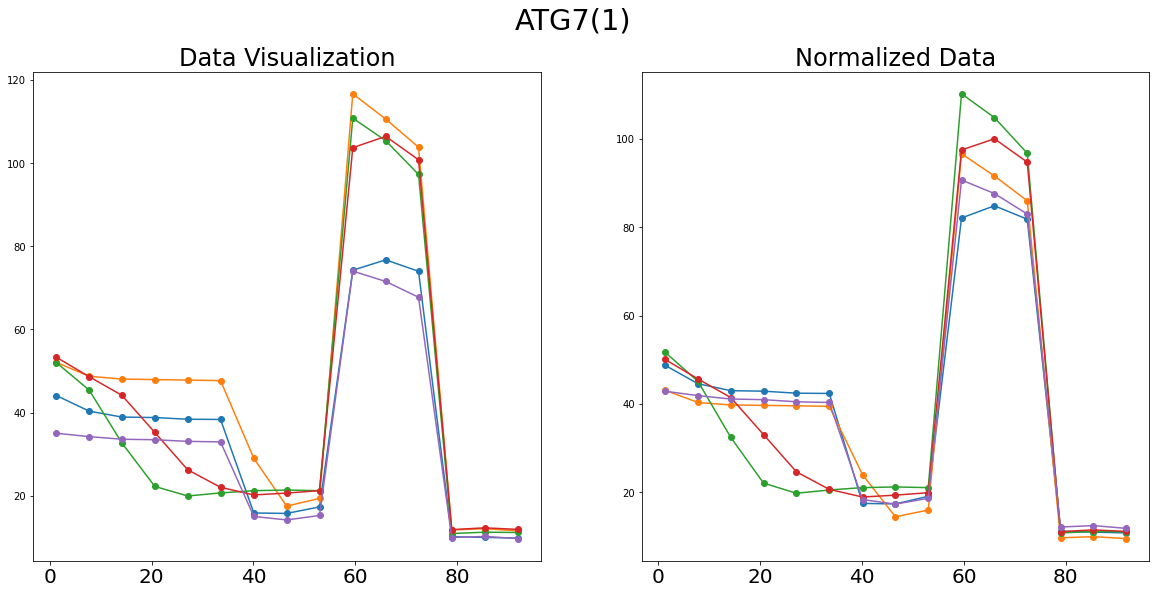

<Figure size 864x576 with 0 Axes>

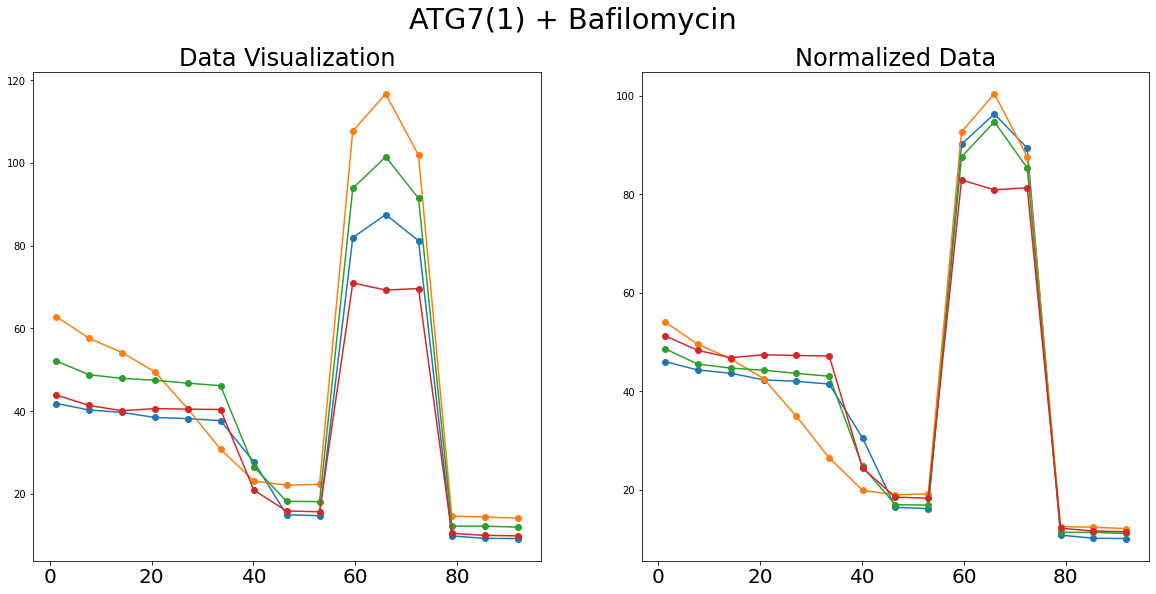

<Figure size 864x576 with 0 Axes>

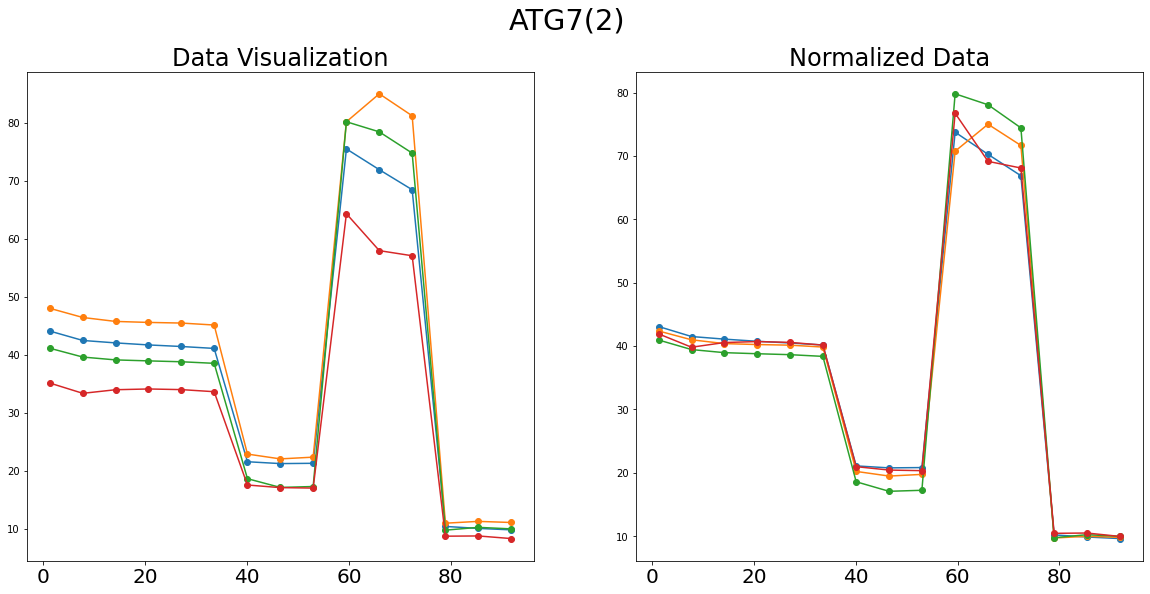

<Figure size 864x576 with 0 Axes>

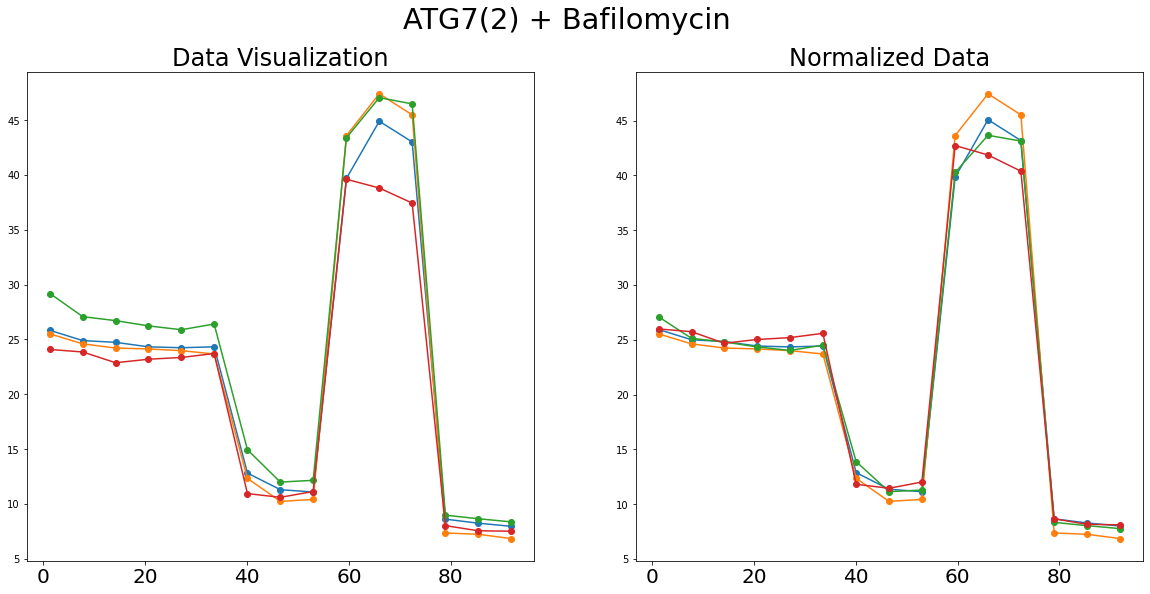

<Figure size 864x576 with 0 Axes>

In [13]:
#Normalization of the data after removing bad wells
all_data = [[normal, 'Normal'], [normal_baf, 'Normal + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##setting graphs
    name = data[1]
    fig, ax = plt.subplots(1,2, figsize=(20,9))
    fig.suptitle(name, fontsize="x-large")
    
    ##graph1
    ax[0].plot(ocr_exp2nonorm['Time'], ocr_exp2nonorm[data[0]], 'o-')
    ax[0].set_title("Data Visualization")
    
    ##normalization
    shift = ocr_exp2nonorm[data[0]].mean()
    general_mean = ocr_exp2nonorm[data[0]].mean().mean()
    relative_mu = shift/general_mean
    
    normalized_data = ocr_exp2nonorm[data[0]]/relative_mu
    
    ##graph2
    ax[1].plot(ocr_exp2nonorm['Time'], normalized_data, 'o-')
    ax[1].set_title("Normalized Data")
    
    plt.show()
    plt.clf()
    print()

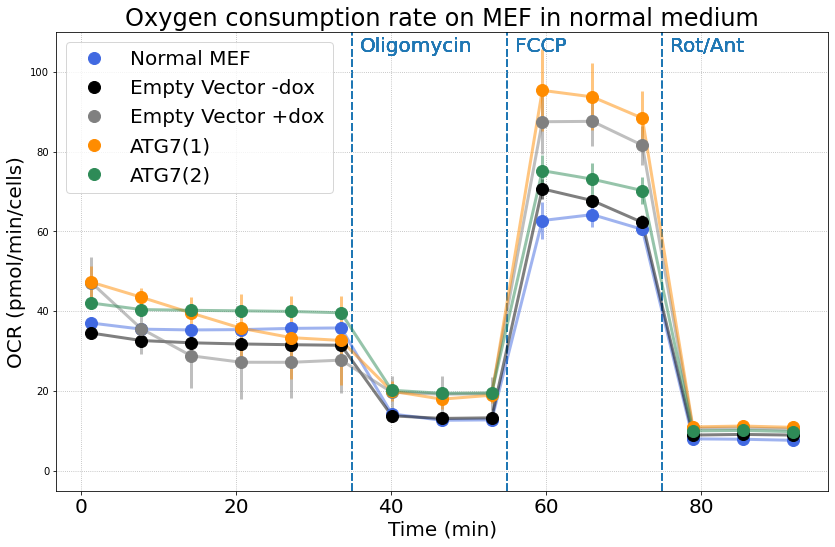

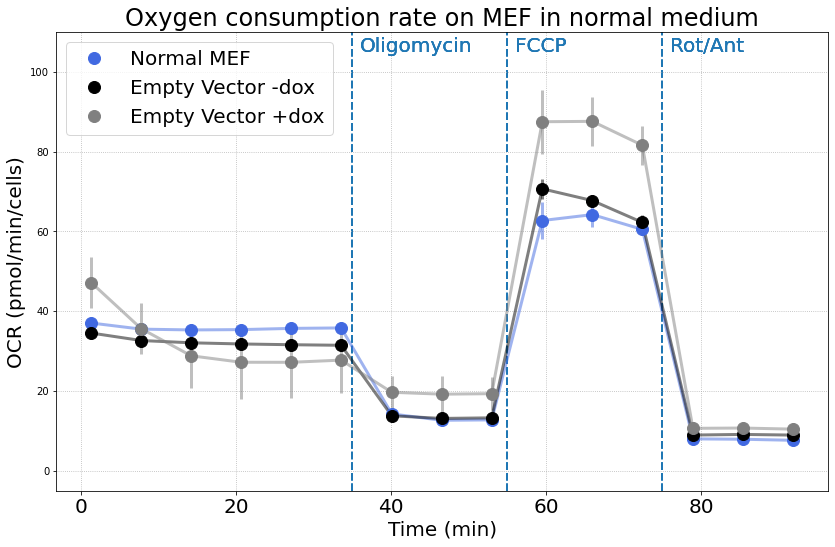

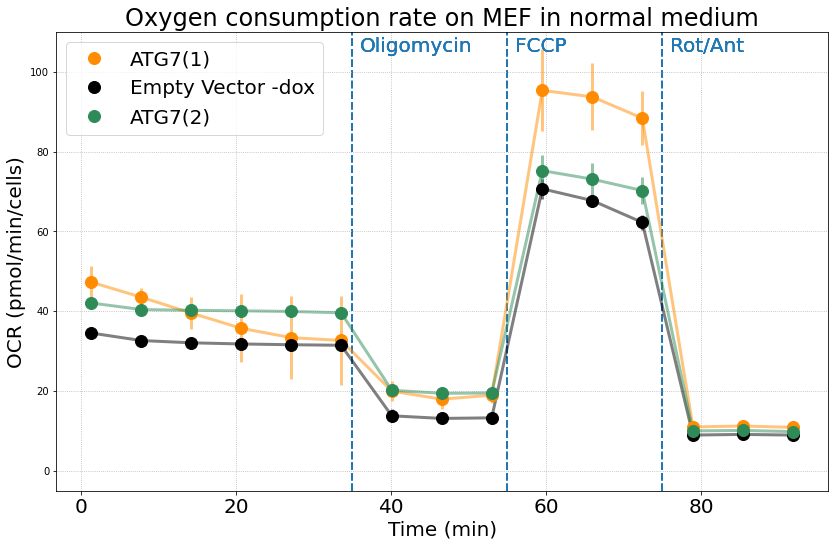

<Figure size 864x576 with 0 Axes>

In [14]:
#Normalization of the data after removing bad wells
##WITHOUT BAFILOMYCIN
all_data = [[normal, 'Normal MEF', "royalblue"],
            [ev_nodox, 'Empty Vector -dox', "black"],
            [ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],
            [wt2, 'ATG7(2)', "seagreen"]]

all_control= [[normal, 'Normal MEF', "royalblue"],
              [ev_nodox, 'Empty Vector -dox', "black"],
              [ev, 'Empty Vector +dox', 'grey']]

all_isof = [[wt1, 'ATG7(1)', 'darkorange'],
            [ev_nodox, 'Empty Vector -dox', "black"],
            [wt2, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ocr_exp2nonorm[data[0]].mean()
        general_mean = ocr_exp2nonorm[data[0]].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ocr_exp2nonorm[data[0]]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ocr_exp2nonorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ocr_exp2nonorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 105, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(56, 105, 'FCCP', color='tab:blue')
        matplotlib.pyplot.text(76, 105, 'Rot/Ant', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Oxygen consumption rate on MEF in normal medium')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('OCR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([-5, 110])
        matplotlib.pyplot.tight_layout()


    plt.show()
    plt.clf()

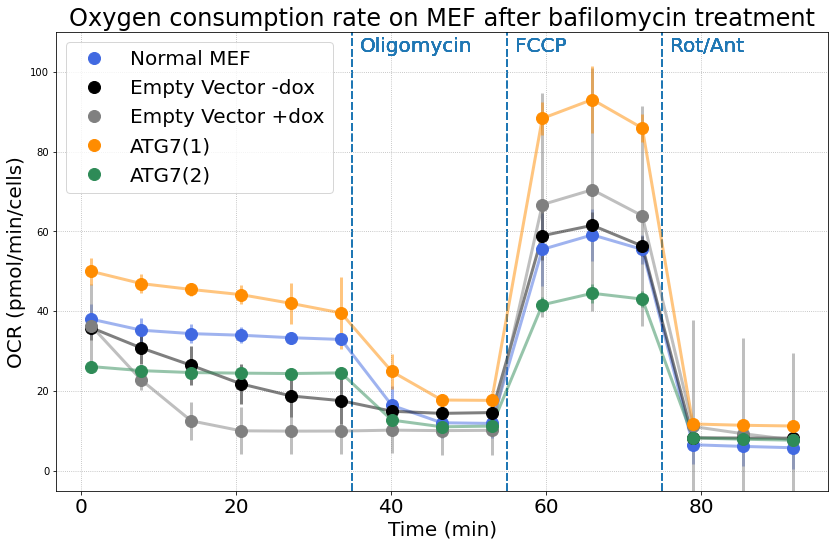

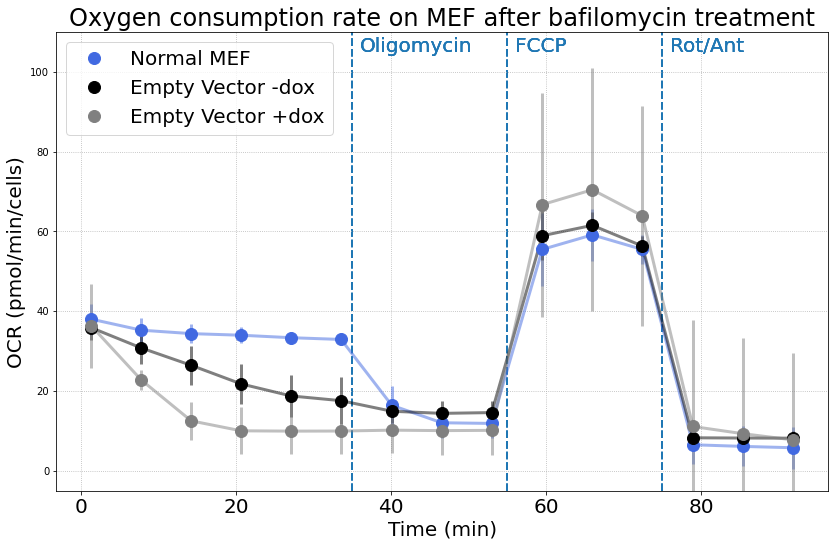

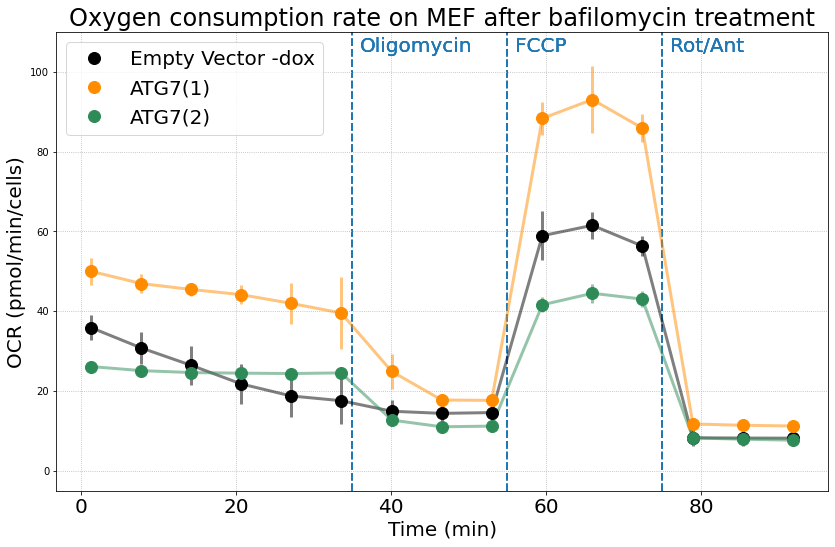

<Figure size 864x576 with 0 Axes>

In [18]:
#Normalization of the data after removing bad wells
##WITH BAFILOMYCIN
all_data = [[normal_baf, 'Normal MEF', "royalblue"],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

all_control= [[normal_baf, 'Normal MEF', "royalblue"],
              [ev_nodox_baf, 'Empty Vector -dox', "black"],
              [ev_baf, 'Empty Vector +dox', 'grey']]

all_isof = [[ev_nodox_baf, 'Empty Vector -dox', "black"],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ocr_exp2nonorm[data[0]].mean()
        general_mean = ocr_exp2nonorm[data[0]].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ocr_exp2nonorm[data[0]]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ocr_exp2nonorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ocr_exp2nonorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 105, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(56, 105, 'FCCP', color='tab:blue')
        matplotlib.pyplot.text(76, 105, 'Rot/Ant', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Oxygen consumption rate on MEF after bafilomycin treatment')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('OCR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([-5, 110])
        matplotlib.pyplot.tight_layout()
    plt.show()
    plt.clf()
